# Welcome to my Online Retail Analysis Notebook

If you haven't done so already, download [the data](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset)

Place the `online_retail_II.xlsx` in the Pandas_Tableau_Project folder

## Setting Up

In [122]:
pip install pandas openpyxl matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [123]:
import pandas as pd
import openpyxl
import matplotlib as plt

#### load

In [124]:
df = pd.read_excel('../Pandas_Tableau_Project/online_retail_II.xlsx')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [125]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

## Cleaning

#### Remove nulls

In [126]:
df = df.dropna(subset=['Customer ID']) \
    .reset_index(drop=True).copy()

#### Remove duplicates

In [127]:
df = df.loc[~df.duplicated()] \
    .reset_index(drop=True).copy()

#### Checking for duplicated descriptions

In [128]:
desc_counts = (df.groupby('StockCode')['Description']
                 .nunique()
                 .reset_index(name='n_desc'))
stock_dupes = desc_counts.loc[desc_counts['n_desc']>1]
stock_dupes.shape

(424, 2)

there are 424 codes with multiple names, so we'll group by our stock codes instead

## Identify Top Items By Revenue 

#### Make a Revenue Column

In [129]:
df['Revenue'] = df['Quantity'] * df['Price']

#### Create a table to see top 10 earners by revenue

In [130]:
Top_Revenue_Summary = df.groupby('StockCode', as_index=False) \
    .agg(Units=('Quantity','sum'),\
         Total_Revenue=('Revenue', 'sum')) \
    .sort_values('Total_Revenue', ascending=False) \
    .reset_index(drop=True).head(10)


Top_Revenue_Summary


,StockCode,Units,Total_Revenue
0,85123A,55760,148591.51
1,22423,11878,136700.55
2,85099B,48629,85065.15
3,84879,44000,69652.16
4,POST,2075,45520.86
5,48138,6303,40961.65
6,84347,12216,39871.50
7,21843,3780,38536.54
8,22086,13816,36804.50
9,20685,5616,36237.78


## Identify Top Items By Units Sold 

In [131]:
Top_Selling_Summary = df.groupby('StockCode', as_index=False) \
    .agg(Units=('Quantity','sum'),\
         Total_Revenue=('Revenue', 'sum')) \
    .sort_values('Units', ascending=False) \
    .reset_index(drop=True).head(10)


Top_Selling_Summary

,StockCode,Units,Total_Revenue
0,21212,56775,27286.78
1,85123A,55760,148591.51
2,84077,54130,11184.74
3,85099B,48629,85065.15
4,17003,47430,8805.10
5,84879,44000,69652.16
6,84991,35480,17344.05
7,21977,30753,14983.35
8,22197,28435,21608.49
9,37410,25679,3012.07


## Seasonal Effects on Revenue

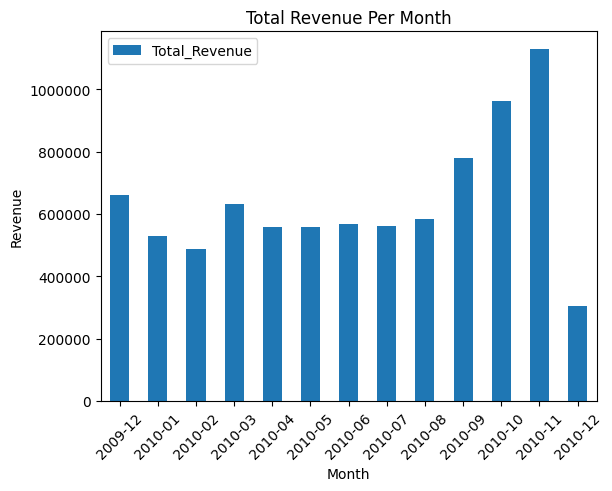

In [132]:
monthly = (df.resample('ME', on="InvoiceDate") \
            .agg(Units = ('Quantity','sum'), \
            Total_Revenue = ('Revenue', 'sum')) \
            .reset_index())

monthly['Month'] = monthly['InvoiceDate'].astype('string').str[:7]

ax = monthly.plot(x = 'Month', y = 'Total_Revenue',kind='bar', title="Total Revenue Per Month", ylabel='Revenue', rot=45, )
ax.ticklabel_format(style="plain", axis="y")

### Who Are Our Top Earners In The Fall Boom

In [133]:
df[df['InvoiceDate'].dt.month.isin([10,11])] \
    .groupby('StockCode', as_index=False) \
    .agg(Revenue = ('Revenue', 'sum')) \
    .sort_values('Revenue', ascending=False) \
    .head(10).reset_index(drop=True)

,StockCode,Revenue
0,22423,40469.55
1,84347,28849.95
2,85123A,27871.73
3,84879,23013.79
4,22086,21055.15
5,85099B,18148.05
6,22910,14872.95
7,POST,14306.60
8,22112,10790.40
9,79321,10649.44


### VS The Year Round Top Earners During This Period

In [134]:
Top_Revenue_df = df[df['StockCode'].isin(Top_Revenue_Summary['StockCode'])]

fall_top_rev = Top_Revenue_df[Top_Revenue_df['InvoiceDate'].dt.month.isin([10,11])].copy()

fall_top_rev.groupby('StockCode', as_index=False) \
    .agg(Revenue = ('Revenue','sum')) \
    .sort_values('Revenue', ascending=False) \
    .reset_index(drop=True).head(10)

,StockCode,Revenue
0,22423,40469.55
1,84347,28849.95
2,85123A,27871.73
3,84879,23013.79
4,22086,21055.15
5,85099B,18148.05
6,POST,14306.60
7,48138,6891.59
8,20685,6024.13
9,21843,5043.35


## Seasonal Effects on Sales

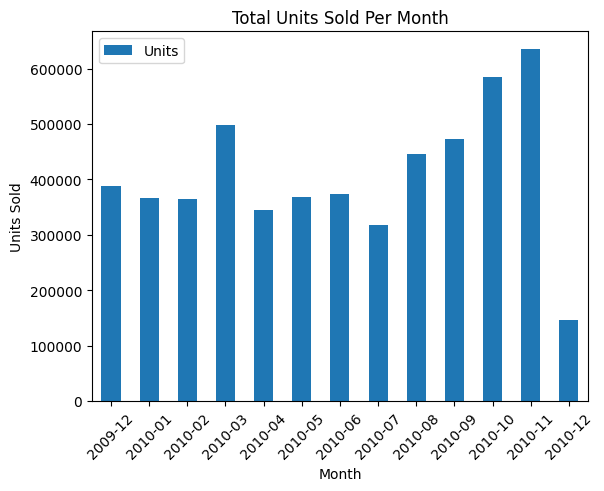

In [135]:
ax = monthly.plot(x = 'Month', y = 'Units',kind='bar', title="Total Units Sold Per Month", ylabel='Units Sold', rot=45, )
ax.ticklabel_format(style="plain", axis="y")

### Who Are Our Best Sellers In The Fall Boom

In [136]:
Top_Selling_df = df[df['StockCode'].isin(Top_Selling_Summary['StockCode'])]

fall_top_sell = Top_Selling_df[Top_Selling_df['InvoiceDate'].dt.month.isin([10,11])].copy()

fall_top_sell.groupby('StockCode', as_index=False) \
    .agg(Units = ('Quantity','sum')) \
    .sort_values('Units', ascending=False) \
    .reset_index(drop=True).head(10)

,StockCode,Units
0,17003,16678
1,84077,15123
2,84879,14731
3,21212,11626
4,22197,11240
5,85099B,10395
6,85123A,10348
7,21977,6024
8,84991,5460


### The Year Round Top Sellers During This Period

In [137]:
df[df['InvoiceDate'].dt.month.isin([10,11])] \
    .groupby('StockCode', as_index=False) \
    .agg(Units = ('Quantity', 'sum')) \
    .sort_values('Units', ascending=False) \
    .reset_index(drop=True).head(10)

,StockCode,Units
0,17003,16678
1,84347,15989
2,84077,15123
3,84879,14731
4,21212,11626
5,22197,11240
6,22952,10788
7,85099B,10395
8,85123A,10348
9,84568,8352


## Exporting Data

In [138]:
df.to_csv('../Pandas_Tableau_Project/Online_Retail_II_Cleaned.csv', index = False)